# Example 1
This notebook's cells will run a small-scale simulation of methdemon for a tumour evolving via gland fission and visualise the methylation arrays of the glands.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Define relative paths to output files
outputs_path = 'outputs/'
methylation_file = 'output_methylation_arrays.dat'
demes_file = 'output_deme_methylation.dat'

In [3]:
# Uncomment the below three lines and run if methdemon has not been compiled yet
# NOTE: Change the path to the include directory of your boost installation

#!cd ../../src
#!g++ -o methdemon methdemon.cpp -I/usr/local/include/ -lm  
#!cd ../examples/eg1

In [4]:
# Run the example simulation
!../../src/methdemon ./outputs configfile-eg1.dat

Done reading parameters
max_clones 1000000; max_genotypes 40000000; max_driver_genotypes 3999; max_demes 72361
dim_grid 269; matrix_max -1; max_distinct_allele_freqs 1000000
max_clones_per_deme 154; max_bintree_clone_elements_per_deme 85
Assigned memory
dim_grid 269, max_demes 72361, num_demes = 1, init_diameter = 1
clone bintrees in use; max_pop 1000000; max_genotypes 40000000
Initialised
################################################################

No more cells

dim_grid 269, max_demes 72361, num_demes = 1, init_diameter = 1
clone bintrees in use; max_pop 1000000; max_genotypes 40000000
Initialised
################################################################

No more cells

dim_grid 269, max_demes 72361, num_demes = 1, init_diameter = 1
clone bintrees in use; max_pop 1000000; max_genotypes 40000000
Initialised
################################################################

No more cells

dim_grid 269, max_demes 72361, num_demes = 1, init_diameter = 1
clone bintrees in use;

In [5]:
# Read in the output files
methylation = pd.read_csv(outputs_path + methylation_file, sep='\t')
demes = pd.read_csv(outputs_path + demes_file, sep='\t')
carrying_capacity = demes.Population.max()
filled_demes = demes[demes['Population'] == carrying_capacity]
filled_demes.head()

,Deme,Population,X,Y,AverageArray
35,35,129,135,129,0.00 0.10 0.00 0.00 0.50 0.50 0.94 0.02 0.21 0...
97,97,129,133,137,0.00 0.00 0.00 0.03 0.50 0.50 0.50 0.03 0.40 0...
207,207,129,133,125,0.02 0.21 0.00 0.02 1.00 0.50 0.50 0.00 0.02 0...
305,305,129,126,134,0.00 0.03 0.00 0.00 0.50 0.50 0.54 0.46 0.03 0...
350,350,129,144,140,0.16 0.00 0.05 0.07 0.50 0.52 0.11 0.62 0.03 0...


In [6]:
# Separate the demes methylation array strings into lists of floats
deme_arrays = filled_demes.AverageArray.apply(lambda x: [float(i) for i in x.split()])

Text(0.5, 1.0, 'Deme 63 methylation array')

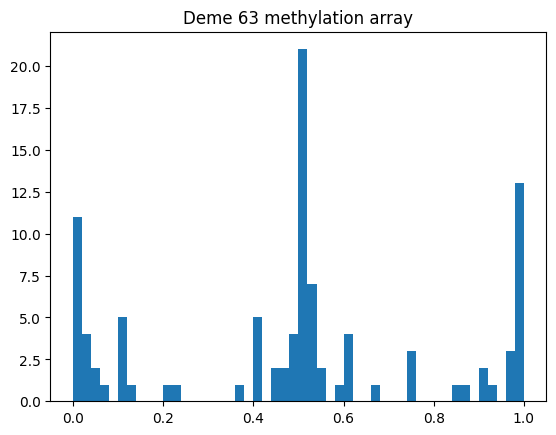

In [7]:
# Plot a randomly selected deme's methylation array
# Randomly select deme to plot
deme = np.random.randint(0, len(deme_arrays))
# Plot the deme's methylation histogram
plt.hist(deme_arrays.iloc[deme], bins=50)
plt.title('Deme ' + str(deme) + ' methylation array')

In [8]:
# Set origin coordinates in the middle of the tumour
xorigin = filled_demes.X.median()
yorigin = filled_demes.Y.median()

In [9]:
# Separate tumour into left and right sides
left_glands = filled_demes[filled_demes['X'] < xorigin].sort_values(by='Y')
right_glands = filled_demes[filled_demes['X'] >= yorigin].sort_values(by='Y')

In [10]:
def select4(glands):
    mid = len(glands) // 2
    if len(glands) % 2 == 0:
        return pd.concat([glands.iloc[mid-2 : mid], glands.iloc[mid : mid+2]])
    else:
        return pd.concat([glands.iloc[mid-2 : mid], glands.iloc[mid+1 : mid+3]])

In [11]:
left_selection = select4(left_glands)
right_selection = select4(right_glands)
right_selection

,Deme,Population,X,Y,AverageArray
4792,4792,129,172,121,0.17 0.02 0.29 0.09 0.50 0.50 0.46 0.23 0.00 0...
207,207,129,133,125,0.02 0.21 0.00 0.02 1.00 0.50 0.50 0.00 0.02 0...
4293,4293,129,173,128,0.00 0.00 0.21 0.00 0.62 0.48 0.37 0.14 0.02 0...
35,35,129,135,129,0.00 0.10 0.00 0.00 0.50 0.50 0.94 0.02 0.21 0...


In [12]:
left_arrays = left_selection.AverageArray.apply(lambda x: [float(i) for i in x.split()])
right_arrays = right_selection.AverageArray.apply(lambda x: [float(i) for i in x.split()])

In [13]:
left_arrays

1052    [0.0, 0.02, 0.19, 0.0, 0.5, 0.5, 0.5, 0.03, 0....
7253    [0.01, 0.0, 0.05, 0.01, 0.5, 0.87, 0.45, 0.5, ...
4573    [0.0, 0.0, 0.01, 0.0, 0.5, 0.68, 0.5, 0.49, 0....
305     [0.0, 0.03, 0.0, 0.0, 0.5, 0.5, 0.54, 0.46, 0....
Name: AverageArray, dtype: object

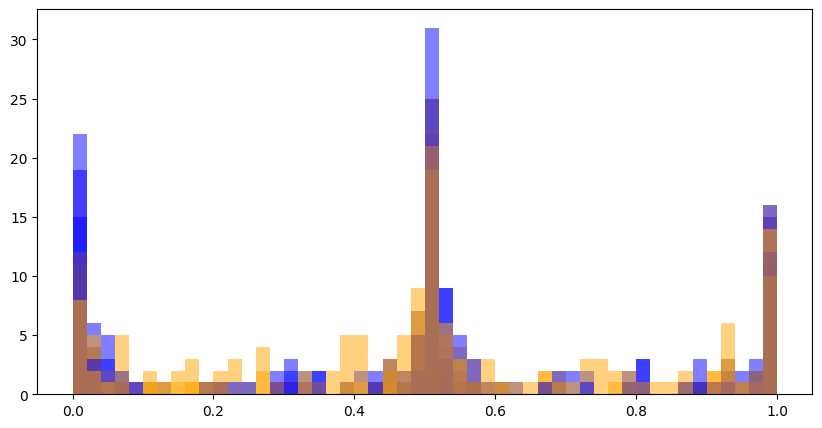

In [14]:
# Plot the methylation arrays of the selected demes on the same histogram with left glands being in a blue colour palette and right glands in orange
plt.figure(figsize=(10, 5))
for i in range(len(left_arrays)):
    plt.hist(left_arrays.iloc[i], bins=50, color='blue', alpha=0.5)
    plt.hist(right_arrays.iloc[i], bins=50, color='orange', alpha=0.5)

In [15]:
left_arrays = left_arrays.reset_index(drop=True)
right_arrays = right_arrays.reset_index(drop=True)
all_samples = pd.concat([left_arrays, right_arrays], axis=0)

In [16]:
all_samples

0    [0.0, 0.02, 0.19, 0.0, 0.5, 0.5, 0.5, 0.03, 0....
1    [0.01, 0.0, 0.05, 0.01, 0.5, 0.87, 0.45, 0.5, ...
2    [0.0, 0.0, 0.01, 0.0, 0.5, 0.68, 0.5, 0.49, 0....
3    [0.0, 0.03, 0.0, 0.0, 0.5, 0.5, 0.54, 0.46, 0....
0    [0.17, 0.02, 0.29, 0.09, 0.5, 0.5, 0.46, 0.23,...
1    [0.02, 0.21, 0.0, 0.02, 1.0, 0.5, 0.5, 0.0, 0....
2    [0.0, 0.0, 0.21, 0.0, 0.62, 0.48, 0.37, 0.14, ...
3    [0.0, 0.1, 0.0, 0.0, 0.5, 0.5, 0.94, 0.02, 0.2...
Name: AverageArray, dtype: object

/opt/homebrew/Caskroom/miniconda/base/envs/methdemon_examples/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/methdemon_examples/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/methdemon_examples/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/methdemon_examples/lib/python3.11/site-packag

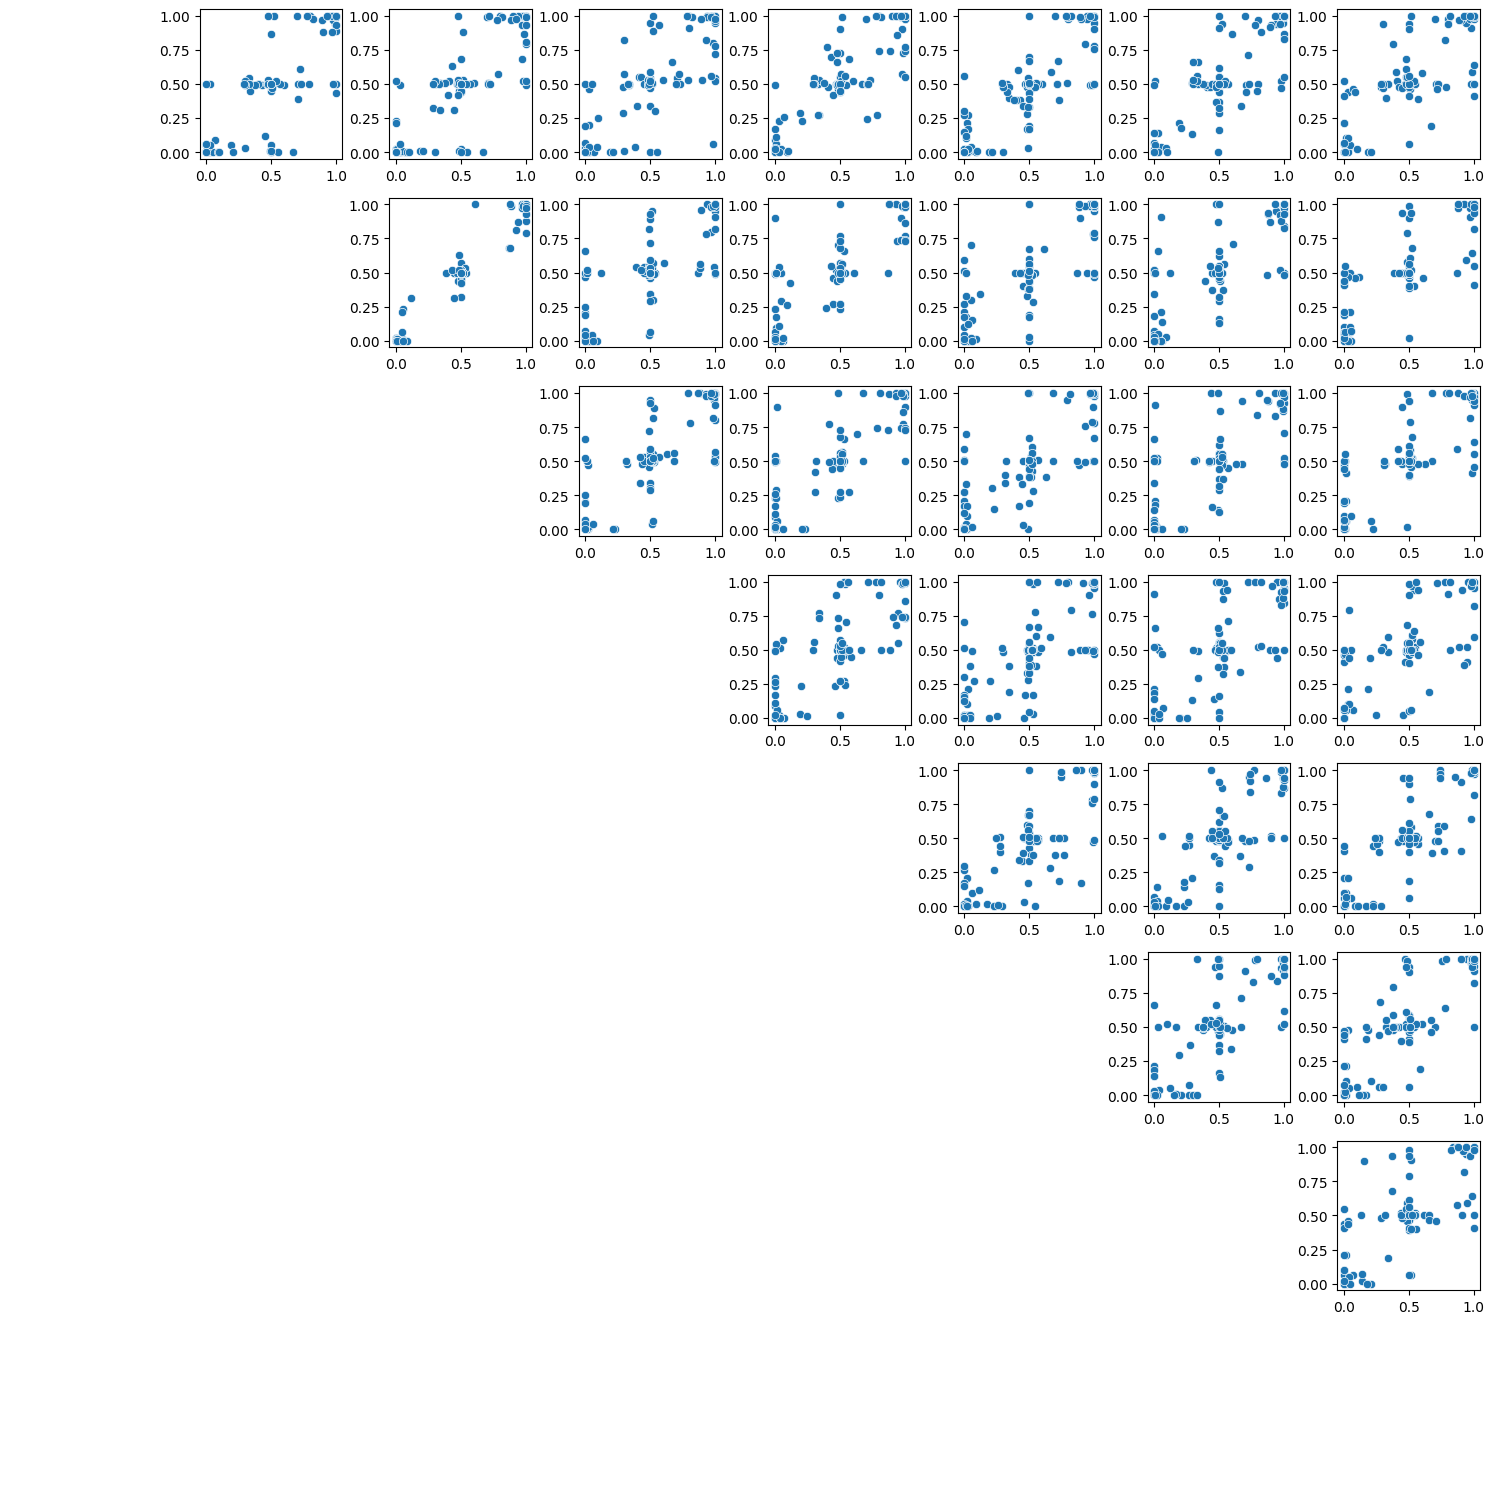

In [17]:
# Correlation plots for each two sampled demes

num_samples = 8
fig, axes = plt.subplots(num_samples, num_samples, figsize=(15, 15))

for i in range(num_samples):
    for j in range(num_samples):
        if j > i:  # We only plot above the diagonal
            sns.scatterplot(data=all_samples, x=all_samples.iloc[i], y=all_samples.iloc[j], ax=axes[i, j])
        else:
            axes[i, j].set_axis_off()  # Turn off axes for other plots

plt.tight_layout()
plt.show()